In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [66]:
startup=pd.read_csv("C:/Users/Yogendra/Downloads/50_Startups.csv")

In [44]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

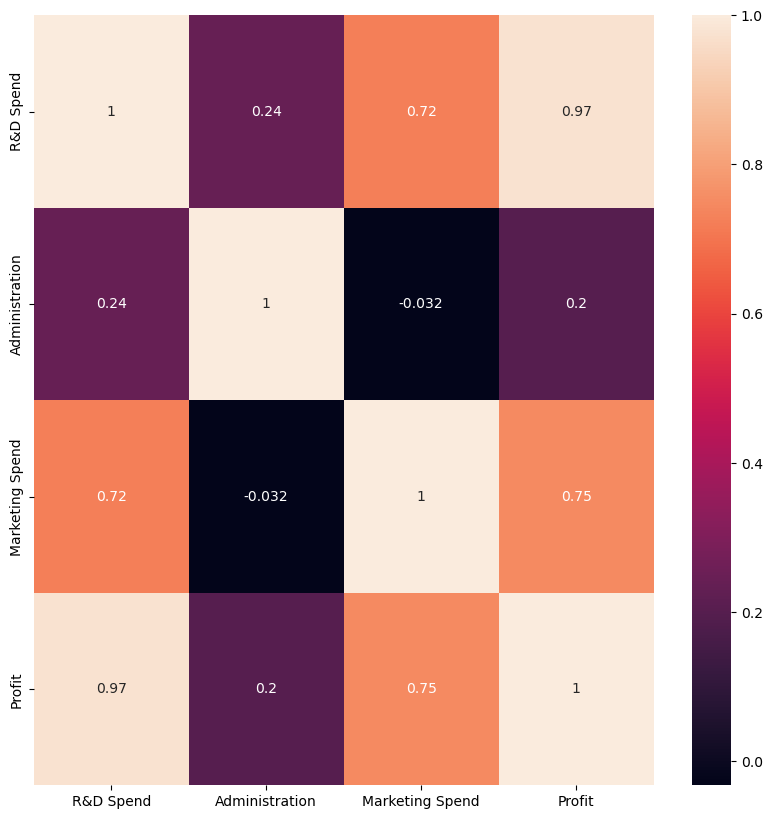

In [6]:
corr = startup.select_dtypes('number').corr()
top_corr_features = corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(startup[top_corr_features].corr(),annot=True)

In [7]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


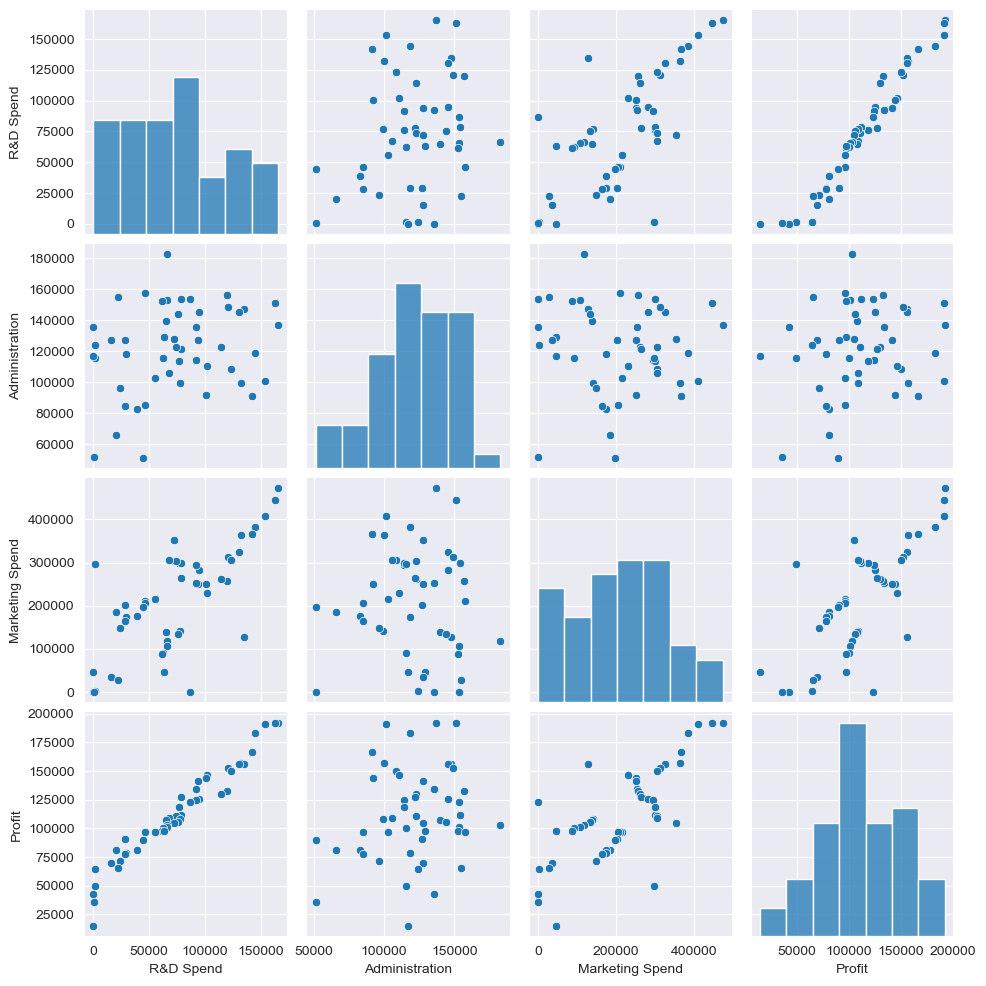

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [67]:
startup.rename(columns={'R&D Spend':'RSpend','Marketing Spend':'Marketing'}, inplace=True)
startup.head()

,RSpend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [68]:
model = smf.ols('Profit~RSpend+Administration+Marketing',data=startup).fit()

model.summary()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        19:33:07   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RSpend             0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
xsqrtmodel=smf.ols("Profit~np.sqrt(RSpend)+np.sqrt(Administration)+np.sqrt(Marketing)", data=startup).fit()

In [38]:
xsqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           7.80e-24
Time:                        15:49:25   Log-Likelihood:                -541.02
No. Observations:                  50   AIC:                             1090.
Df Residuals:                      46   BIC:                             1098.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 2.65e+04    1.6e+04      1.659      0.104   -5661.877    5.87e+04
np.sqrt(RSpend)           349.3581     25.349     13.782      0.000     298.333     400.383
np.sqrt(Administration)   -22.6863     45.626     -0.497      0.621    -114.527      69.155
np.sqrt(Marketing)         13.7113     14.955      0.917      0.364     -16.391      43.814
==============================================================================
Omnibus:                        8.679   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.356
Skew:                           0.989   Prob(JB):                       0.0153
Kurtosis:                       3.312   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ysqrtmodel=smf.ols("np.sqrt(Profit)~RSpend+Administration+Marketing", data=startup).fit()

In [18]:
ysqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.47e-22
Time:                        19:34:39   Log-Likelihood:                -222.63
No. Observations:                  50   AIC:                             453.3
Df Residuals:                      46   BIC:                             460.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        226.8787     15.417     14.716      0.000     195.846     257.912
RSpend             0.0013      0.000     11.814      0.000       0.001       0.001
Administration  1.586e-06      0.000      0.013      0.989      -0.000       0.000
Marketing       4.338e-05   3.86e-05      1.124      0.267   -3.43e-05       0.000
==============================================================================
Omnibus:                       55.580   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.045
Skew:                          -2.793   Prob(JB):                     9.87e-82
Kurtosis:                      15.160   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
xysqrtmodel=smf.ols("np.sqrt(Profit)~np.sqrt(RSpend)+np.sqrt(Administration)+np.sqrt(Marketing)", data=startup).fit()

In [20]:
xysqrtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Profit)   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.22e-26
Time:                        19:35:40   Log-Likelihood:                -212.39
No. Observations:                  50   AIC:                             432.8
Df Residuals:                      46   BIC:                             440.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 188.0384     22.340      8.417      0.000     143.070     233.007
np.sqrt(RSpend)             0.5775      0.035     16.293      0.000       0.506       0.649
np.sqrt(Administration)    -0.0306      0.064     -0.480      0.634      -0.159       0.098
np.sqrt(Marketing)          0.0149      0.021      0.711      0.481      -0.027       0.057
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               26.638
Skew:                           0.133   Prob(JB):                     1.64e-06
Kurtosis:                       6.566   Cond. No.                     5.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
ylogmodel=smf.ols("np.log(Profit)~RSpend+Administration+Marketing", data=startup).fit()

In [23]:
ylogmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Profit)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     49.02
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           2.28e-14
Time:                        19:38:02   Log-Likelihood:                 3.9014
No. Observations:                  50   AIC:                            0.1972
Df Residuals:                      46   BIC:                             7.845
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.8383      0.166     65.249      0.000      10.504      11.173
RSpend          8.122e-06   1.14e-06      7.118      0.000    5.83e-06    1.04e-05
Administration  3.083e-07   1.29e-06      0.239      0.812   -2.29e-06     2.9e-06
Marketing       3.214e-07   4.16e-07      0.773      0.443   -5.15e-07    1.16e-06
==============================================================================
Omnibus:                       74.731   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.557
Skew:                          -3.913   Prob(JB):                    4.26e-204
Kurtosis:                      22.705   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [47]:
X=startup.drop(['State','Profit'],axis= 1)

In [49]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [50]:
Y=startup['Profit']

In [51]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

In [53]:
skmodel = LinearRegression()

In [55]:
skmodel.fit(X_train,y_train)

LinearRegression()

In [57]:
predictions = skmodel.predict(X_test)

In [58]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  72767199.14073612
mean_absolute_error :  7025.635437378252


In [59]:
skmodel.score(X,Y)

0.9481440289303846

In [60]:
skmodel.coef_

array([0.78252121, 0.04497543, 0.03280294])

In [61]:
skmodel.intercept_

41081.801319404054